In [6]:
!pip install geopandas
!pip install seaborn

https://catalog.data.gov/dataset/crime-data-from-2020-to-present - link to download dataset
Jakub Bednarz

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import csv
import seaborn as sns

In [8]:
#a)
#Your code:
#remember to use your own directory
df = pd.read_csv('/home/jakub/datascience/Crime_Data_from_2020_to_Present.csv')
rows = []
df.head(10)

#Hint: read_csv(), head()

DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   
5  200100501  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM        30     1   
6  200100502  01/02/2020 12:00:00 AM  01/02/2020 12:00:00 AM      1315     1   
7  200100504  01/04/2020 12:00:00 AM  01/04/2020 12:00:00 AM        40     1   
8  200100507  01/04/2020 12:00:00 AM  01/04/2020 12:00:00 AM       200     1   
9  201710201  06/19/2020 12:00:00 AM  05/26/2020 12:00:00 AM      1925    17   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2      Central          155         2     845   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   
5      Central          163         1     121   
6      Central          161         1     442   
7      Central          155         2     946   
8      Central          101         1     341   
9   Devonshire         1708         1     341   

                                         Crm Cd Desc  ... Status  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO   
1                           BATTERY - SIMPLE ASSAULT  ...     IC   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...     AA   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   
5                                     RAPE, FORCIBLE  ...     IC   
6           SHOPLIFTING - PETTY THEFT ($950 & UNDER)  ...     IC   
7                          OTHER MISCELLANEOUS CRIME  ...     IC   
8  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...  ...     IC   
9  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...  ...     AO   

    Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0   Adult Other    624.0      NaN       NaN      NaN   
1   Invest Cont    624.0      NaN       NaN      NaN   
2  Adult Arrest    845.0      NaN       NaN      NaN   
3   Invest Cont    745.0    998.0       NaN      NaN   
4   Invest Cont    740.0      NaN       NaN      NaN   
5   Invest Cont    121.0    998.0       NaN      NaN   
6   Invest Cont    442.0    998.0       NaN      NaN   
7   Invest Cont    946.0    998.0       NaN      NaN   
8   Invest Cont    341.0    998.0       NaN      NaN   
9   Adult Other    341.0      NaN       NaN      NaN   

                                   LOCATION Cross Street      LAT       LON  
0   1100 W  39TH                         PL          NaN  34.0141 -118.2978  
1    700 S  HILL                         ST          NaN  34.0459 -118.2545  
2    200 E  6TH                          ST          NaN  34.0448 -118.2474  
3   5400    CORTEEN                      PL          NaN  34.1685 -118.4019  
4  14400    TITUS                        ST          NaN  34.2198 -118.4468  
5                           700 S  BROADWAY          NaN  34.0452 -118.2534  
6    700 S  FIGUEROA                     ST          NaN  34.0483 -118.2631  
7    200 E  6TH                          ST          NaN  34.0448 -118.2474  
8    700    BERNARD                      ST          NaN  34.0677 -118.2398  
9  11900    BALBOA                       BL          NaN  34.2864 -118.5021  

[10 rows x 28 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815882 entries, 0 to 815881
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           815882 non-null  int64  
 1   Date Rptd       815882 non-null  object 
 2   DATE OCC        815882 non-null  object 
 3   TIME OCC        815882 non-null  int64  
 4   AREA            815882 non-null  int64  
 5   AREA NAME       815882 non-null  object 
 6   Rpt Dist No     815882 non-null  int64  
 7   Part 1-2        815882 non-null  int64  
 8   Crm Cd          815882 non-null  int64  
 9   Crm Cd Desc     815882 non-null  object 
 10  Mocodes         703120 non-null  object 
 11  Vict Age        815882 non-null  int64  
 12  Vict Sex        708690 non-null  object 
 13  Vict Descent    708682 non-null  object 
 14  Premis Cd       815873 non-null  float64
 15  Premis Desc     815402 non-null  object 
 16  Weapon Used Cd  284434 non-null  float64
 17  Weapon Des

In [12]:
crime_numerical_df=(['Vict Age','LAT','LON'])

In [13]:
df_num = df[crime_numerical_df]

description = df_num.describe()

print(description)

            Vict Age            LAT            LON
count  815882.000000  815882.000000  815882.000000
mean       29.818963      33.800054    -117.404189
std        21.772828       3.042256      10.560763
min        -3.000000       0.000000    -118.667600
25%         8.000000      34.011700    -118.429100
50%        31.000000      34.057900    -118.320500
75%        45.000000      34.162900    -118.273900
max       120.000000      34.334300       0.000000


Let's look at data from 2022. We can see here map of LA and age of victims.
We can see that underage people are less likely to comite a crime

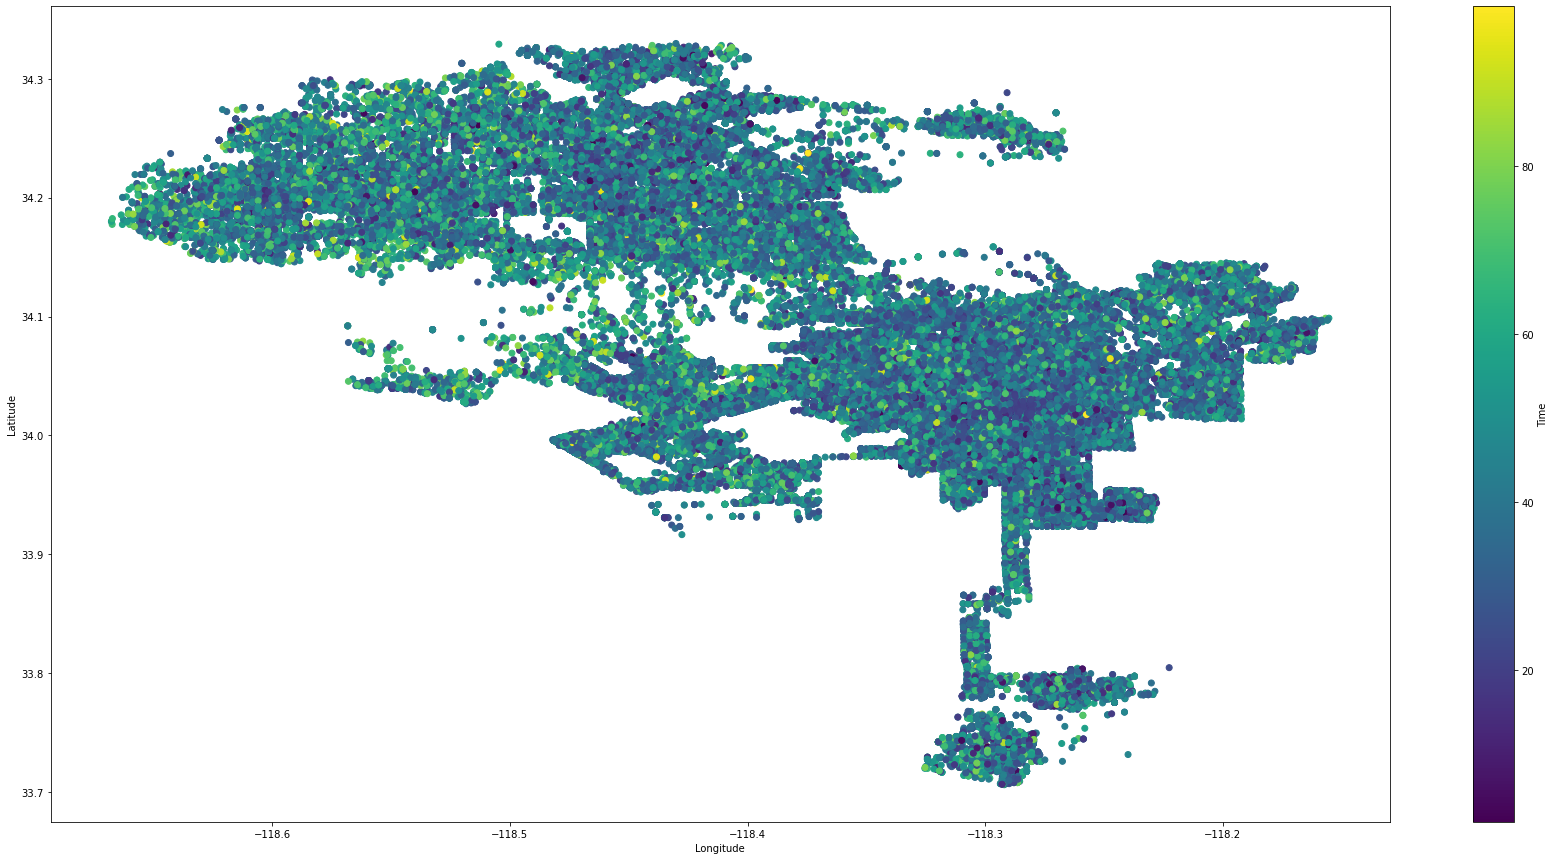

In [14]:

df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
filtered_data = df[(df['DATE OCC'].dt.year == 2022) & (df['Vict Age'] > 0) & (df['LON'] <= -20)]
plt.figure(figsize=(30, 15))
plt.scatter(filtered_data['LON'], filtered_data['LAT'],c=filtered_data['Vict Age'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Time')
plt.show()


I had to filter some date becouse of lack of data. Some locations has LAT=0,LON=0 which makes 
plot zoomed out and unreadable.
It's hard to make map which shows 'brutality' of crimes in different locations without police codes knowledge. 
Anyway interesting thing is map corealated with time, whcich shows how safe is LA

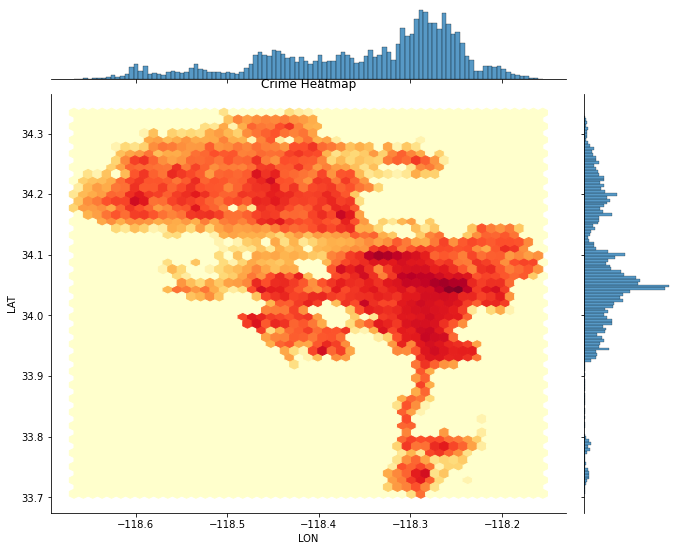

In [15]:
filtered_data = df[(df['DATE OCC'].dt.year == 2022) & (df['LON'] <= -20)]
heatmap = sns.jointplot(data=filtered_data, x='LON', y='LAT', kind='hex', bins='log', cmap='YlOrRd')

heatmap.fig.set_figwidth(10)
heatmap.fig.set_figheight(8)
plt.title("Crime Heatmap")
plt.show()



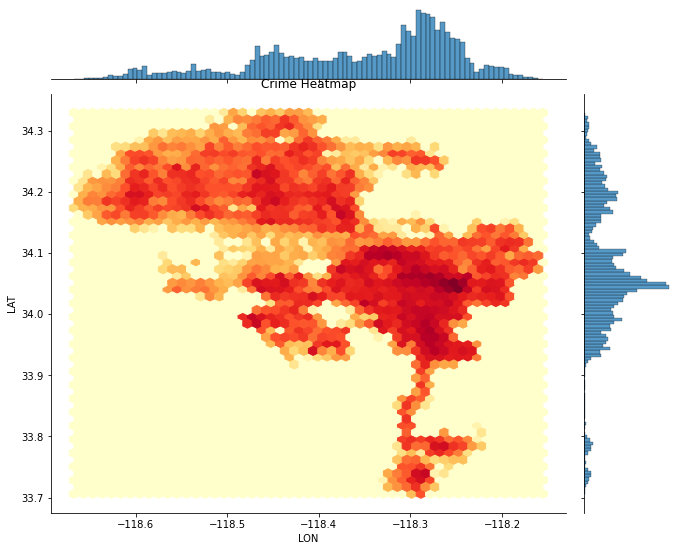

In [16]:
filtered_data = df[(df['DATE OCC'].dt.year == 2020) & (df['LON'] <= -20)]

heatmap = sns.jointplot(data=filtered_data, x='LON', y='LAT', kind='hex', bins='log', cmap='YlOrRd')

heatmap.fig.set_figwidth(10)
heatmap.fig.set_figheight(8)
plt.title("Crime Heatmap")
plt.show()

We have 2 heat maps above, first from 2022 and secound from 2020. We can see here which parts of the city are dangerous. Those areas haven't changed over time. 


Let's take a look at some stereotypes. It's not a sureprise that blacks are known from their cruelness.
The plot below shows how many crimes each race has commited

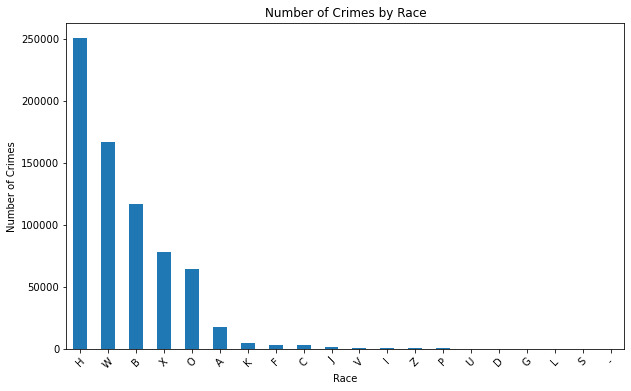

In [17]:
race_counts = df['Vict Descent'].value_counts()

plt.figure(figsize=(10, 6))
race_counts.plot(kind='bar')
plt.title('Number of Crimes by Race')
plt.xlabel('Race')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)  
plt.show()


Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian 
H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean 
L - Laotian O - Other P - Pacific Islander S - Samoan 
U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

We can see that black are on the third place. But it might be missleading. We can't ignore fact what percent
of society constitute each race
Now let's what percent of black/white/Hispanic commit crimes.
Ill get the number flat from wiki.
    Hispanic or Latino (of any race): 46.9%
    White (alone, not Hispanic or Latino): 28.9%
    Asian (alone): 11.7%
    Black or African American (alone): 8.3%
    Two or more races: 3.3%
    Other (alone): 0.7%
    Native American (alone): 0.2%
    Native Hawaiian and Other Pacific Islander (alone): 0.1%
    
 Number of population is about 3 900 000
 But lets assume that single criminal commits single crime

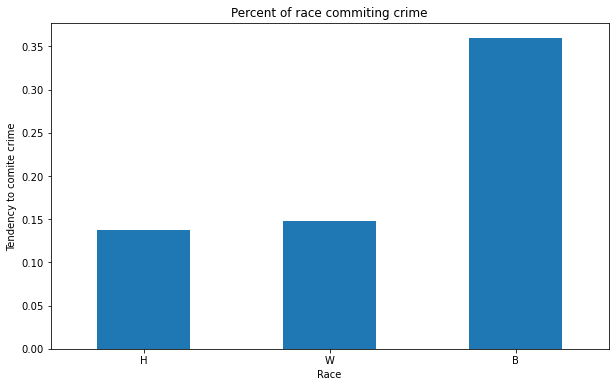

In [18]:
num_of_population = 3900000
population_percentages = {
    'W': (0.289*num_of_population),
    'B': (0.083*num_of_population),
    'H': (0.469*num_of_population)
}

filtered_data = df[df['Vict Descent'].isin(population_percentages.keys())]

race_counts = filtered_data['Vict Descent'].value_counts()

normalized_counts = race_counts / race_counts.index.map(population_percentages) 

plt.figure(figsize=(10, 6))
normalized_counts.plot(kind='bar')
plt.title('Percent of race commiting crime')
plt.xlabel('Race')
plt.ylabel('Tendency to comite crime')
plt.xticks(rotation=0)  
plt.show()


Here we can see that even though total numbers of crimes commited by black people is lower than the rest
Still it shows that black people are 2 times more likely to comit crime

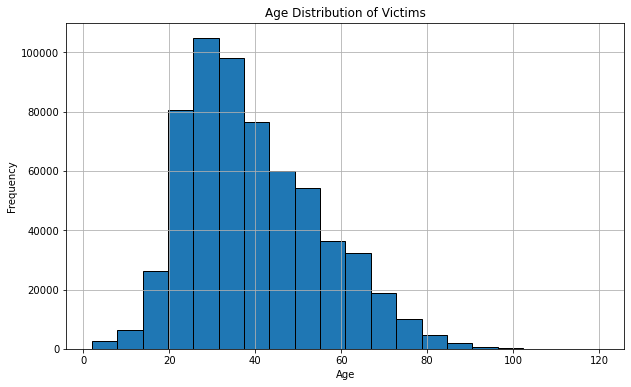

In [19]:
plt.figure(figsize=(10, 6))
filtered_data = df[(df['Vict Age']>0)]
plt.hist(filtered_data['Vict Age'], bins=20, edgecolor='k')
plt.title('Age Distribution of Victims')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

We can see here distribution of age.

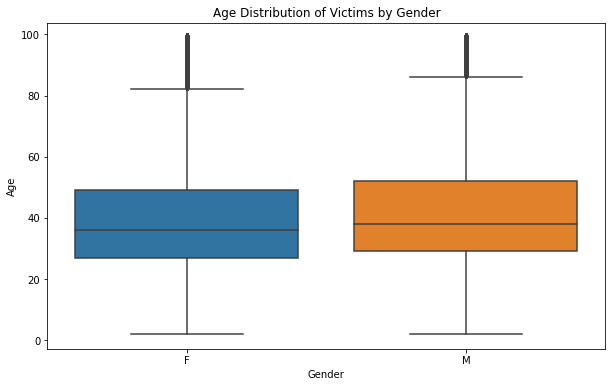

In [37]:
filtered_data = df[(df['Vict Age'] > 0) & ((df['Vict Sex'] == 'M') | (df['Vict Sex'] == 'F'))]

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='Vict Sex', y='Vict Age')
plt.title('Age Distribution of Victims by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

We can see how it goes in both gender. But older men have median kinda higher

In [40]:
!pip install statsmodels
!pip install plotly

     |████████████████████████████████| 15.6 MB 2.0 MB/s eta 0:00:01
  Using cached tenacity-8.2.2-py3-none-any.whl (24 kB)


In [41]:
import plotly.express as px

crime_counts = df['Crm Cd Desc'].value_counts()

treemap_data = pd.DataFrame({'Crime Description': crime_counts.index, 'Frequency': crime_counts.values})

fig = px.treemap(treemap_data, path=['Crime Description'], values='Frequency', title='Crime Description Treemap')

fig.update_traces(textinfo='label+value', selector=dict(type='treemap'))

fig.show()

Here is the most interesting thing. We can see here what types of crimes were commited and how many of them since 2020-present